In [20]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [33]:
# 생성자를 호출하는 밥법
class MyLayer : 
    def __init__(self, unit):
        self.unit = unit
        print('unit: ', unit)
        print("hello")
        
    def __call__(self, v): # 객체이름을 가지고 부를수 있는 함수
        print(self.unit, v)
        print(v)
        return self # 객체이름을 함수로 사용가능
    # 여러번 호출가능
        
    def test(self, v):
        print(v)
    
#A = MyLayer()
#A.test(10)
#A(20)

#A = MyLayer()(20)
# A = MyLayer()
# A(20)

A = MyLayer(20)
# A = MyLayer(20)([1,2,3,4,5])
A([3,3,4])
A.test(4)

B = MyLayer(20)
C = MyLayer(20)


unit:  20
hello
20 [3, 3, 4]
[3, 3, 4]
4
unit:  20
hello
unit:  20
hello


__callable__이란  
이미 생성된 객체에 대해서 함수처럼 호출할 수 있도록 함

# 얼굴인식 
---

In [36]:
from sklearn.datasets import fetch_olivetti_faces
import cv2

orl = fetch_olivetti_faces()
data = orl.data # 0~1로 정규화 되어있음.
target = orl.target
print(data.shape)
print(target.shape)


(400, 4096)
(400,)


In [56]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

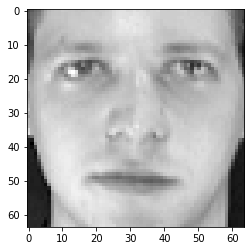

In [37]:
plt.imshow(data[0, :].reshape(64, 64), cmap="gray")

In [38]:
data = np.zeros((400, 32*32), dtype="uint8")

for i, d in enumerate(orl.data): # i: index d: value
    image = cv2.resize(d.reshape(64, 64), (32,32))
    data[i,:] = image.flatten()*255

(400, 1024)


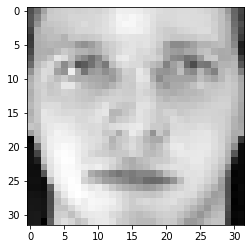

In [40]:
plt.imshow(data[0, :].reshape(32, 32), cmap="gray")
print(data.shape)

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
    train_test_split(data, target, test_size=0.2)
    
print(X_train.shape)
print(X_val.shape)


(320, 1024)
(80, 1024)


In [108]:
# cnn을 돌리기위해 4차원 & 원핫 인코딩
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

import keras.utils as utils
y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)

In [109]:
print(X_train.shape)
print(y_train_e.shape)
print(X_val.shape)
print(y_val_e.shape)

X_train = X_train / 255
X_val = X_val /255
# y_train = y_train / 255

(320, 32, 32, 1)
(320, 40)
(80, 32, 32, 1)
(80, 40)


In [112]:
model = Sequential()

model.add(Conv2D(input_shape = (32,32,1), filters = 16, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))

model.add(Dense(40, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_23 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 50)          14450     
_________________________________________________________________
activation_24 (Activation)   (None, 8, 8, 50)        

In [113]:
hist = model.fit(x = X_train, y = y_train_e, # 원핫 인코팅된 y
                batch_size = 50,
                epochs = 50, verbose = 1) 


Epoch 1/50
320/320 [==============================] - 1s 2ms/step - loss: 3.7029 - accuracy: 0.0219
Epoch 2/50
320/320 [==============================] - 0s 894us/step - loss: 3.6831 - accuracy: 0.0500
Epoch 3/50
320/320 [==============================] - 0s 1ms/step - loss: 3.6742 - accuracy: 0.0312
Epoch 4/50
320/320 [==============================] - 0s 981us/step - loss: 3.6623 - accuracy: 0.0312
Epoch 5/50
320/320 [==============================] - 0s 1ms/step - loss: 3.6420 - accuracy: 0.0719
Epoch 6/50
320/320 [==============================] - 0s 1ms/step - loss: 3.6164 - accuracy: 0.0875
Epoch 7/50
320/320 [==============================] - 0s 978us/step - loss: 3.5674 - accuracy: 0.0562
Epoch 8/50
320/320 [==============================] - 0s 934us/step - loss: 3.4749 - accuracy: 0.1000
Epoch 9/50
320/320 [==============================] - 0s 903us/step - loss: 3.3007 - accuracy: 0.1562
Epoch 10/50
320/320 [==============================] - 0s 938us/step - loss: 3.1054 - accu

In [114]:
score = model.evaluate(X_val, y_val_e, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.987500011920929


In [80]:
p = model.predict(X_val[1,:].reshape(-1, 32, 32, 1))

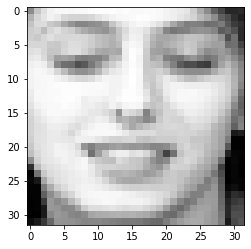

In [81]:
plt.imshow(X_val[0,:].reshape(32,32), cmap='gray')